In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

In [49]:
data = pd.read_csv('E:\Mat_Work\machine-learning-ex2\ex2\ex2data2.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


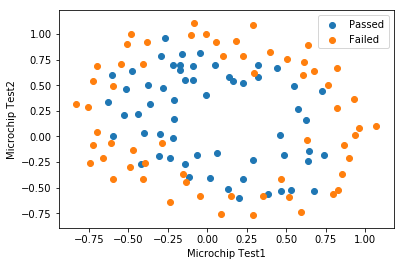

In [50]:
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [51]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

In [52]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [53]:
def costFunction(theta,X,y,lambda_t):
    m = len(y)
    J = (-1/m) * (y.T @ np.log(sigmoid(X@theta)) + (1-y.T)@np.log(1 - sigmoid(X@theta)))
    reg = (lambda_t/2*m)*(theta[1:].T@theta[1:])
    J = J+reg
    return J

In [54]:
def gradientDescent(theta,X,y,lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

In [55]:
(m,n) = X.shape
y = y[:,np.newaxis]
theta = np.zeros((n,1))
lambda_t = 1
J = costFunction(theta,X,y,lambda_t)
print(J)

[[0.69314718]]


In [56]:
output = opt.fmin_tnc(func = costFunction, x0 = theta.flatten(), fprime = gradientDescent, args = (X, y.flatten(), lambda_t))
theta = output[0]
print(theta)

[ 2.49640504e-04  1.37411664e-04  2.77015264e-04 -4.35864523e-04
 -1.62448946e-04 -2.48689519e-04  3.40749794e-05 -7.16770320e-05
 -7.34919150e-05 -2.03237594e-05 -3.10561369e-04 -1.49837678e-05
 -1.31827480e-04 -4.36565248e-05 -2.29977884e-04 -3.43138390e-05
 -4.33024117e-05 -1.87923601e-05 -5.59544625e-05 -5.21231445e-05
 -9.08338038e-05 -2.10980729e-04  2.17307928e-06 -6.54197890e-05
 -8.84386569e-07 -6.91289403e-05 -1.78749503e-05 -1.85529268e-04]


In [57]:
pred = [sigmoid(np.dot(X, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

80.50847457627118

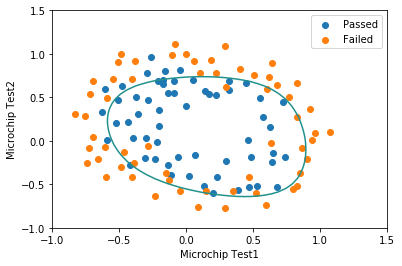

In [58]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()